In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz

%matplotlib inline

c:\Users\yastr\OneDrive\Документы\VScode\Projects\Projects_Python\Article_Work\jupyter_for_qutip\myenv\Lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [2]:
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate

H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect

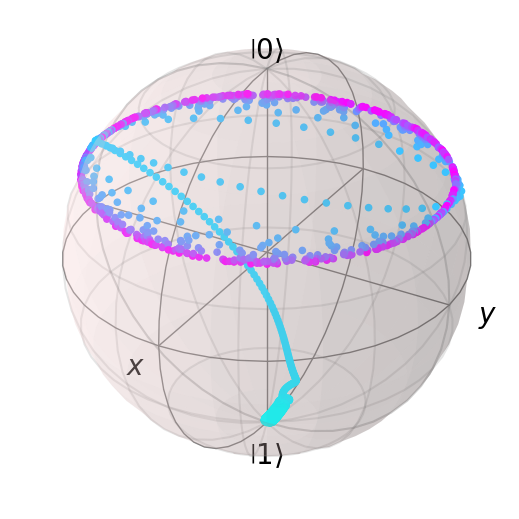

In [3]:
b = Bloch()
# normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(-2, 10)
colors = cm.cool(nrm(tlist))

# add data points from expectation values ##
b.add_points([expt_list[1], expt_list[2], -expt_list[3]], "m")

# customize sphere properties ##
b.point_color = list(colors)
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()